# Analysis of the Thermal IR Data

In [1]:
import glob
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

In [2]:
nc_path = "/Users/bhupendra/data/konza_burn/radiancetemps/*.nc"
nc_files = glob.glob(nc_path)
nc_files.sort()
print("found "+str(len(nc_files)))

found 12274


In [ ]:
#nc_data = Dataset(nc_files[8000])
#nc_data
#celsius = nc_data['thermalimage'][:]
#fig = plt.figure(figsize=(12, 8))
ds = xr.open_mfdataset(nc_files, parallel=True)
#fig = ds.thermalimage.plot(cmap="plasma")

In [ ]:
#ds.to_netcdf("/Users/bhupendra/projects/thermal/output/Konza_Thermal_14Apr-18Apr2022.nc")

# All the images

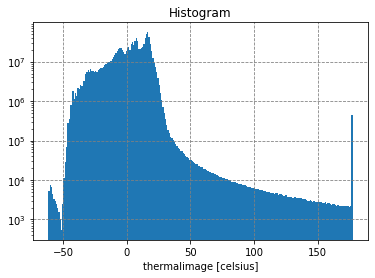

In [87]:
hst = ds.thermalimage.plot.hist(bins=240)
plt.yscale('log')
plt.grid(linestyle='--', color="gray")

plt.savefig("/Users/bhupendra/projects/thermal/plots/Konza_HistLog_14Apr-18Apr2022_All.pdf")

Separate images as per the burn events and then plot hist
1. I checked that first 7000 images are pre-burn, so we separate then as such and so on for all the burns.
2. In preburn images, all recorded tempeararures below 30C. There is break in the hist at arround 25C. 

# a. Pre-burn

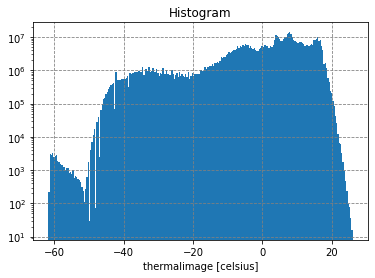

In [123]:
ds.thermalimage[0:7000, :, :].plot.hist(bins=240)
plt.yscale('log')
plt.grid(linestyle='--', color="gray")
plt.savefig("/Users/bhupendra/projects/thermal/plots/Konza_HistLog_14Apr-18Apr2022_PreBurn.pdf")

# b. Burn

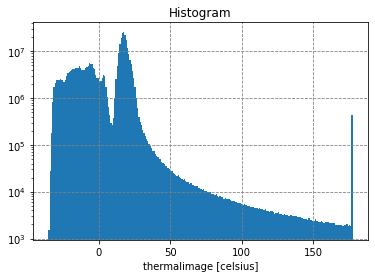

In [126]:
ds.thermalimage[7000:11000, :, :].plot.hist(bins=240)
plt.yscale('log')
plt.grid(linestyle='--', color="gray")
plt.savefig("/Users/bhupendra/projects/thermal/plots/Konza_HistLog_14Apr-18Apr2022_TotalBurn.pdf")

# Camera moved postburn

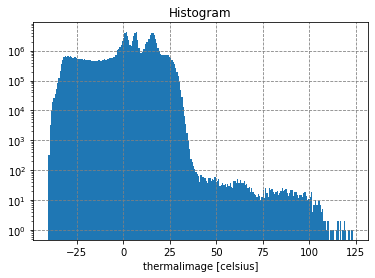

In [127]:
ds.thermalimage[11000:, :, :].plot.hist(bins=240)
plt.yscale('log')
plt.grid(linestyle='--', color="gray")
plt.savefig("/Users/bhupendra/projects/thermal/plots/Konza_HistLog_14Apr-18Apr2022_PostBurn.pdf")

In [125]:
nc_files[11000]

'/Users/bhupendra/data/konza_burn/radiancetemps/sage_mobotix_radiancetemps_20220415-224029.nc'